# Tarea 3.2 - Agrupamiento - Algoritmos Genéticos

## Edison David González Blandón & Juan Esteban Velasquéz Franco

### Inicializando las condiciones iniciales y generando datos

Inicialmente el algoritmo genetico requiere un tamaño de población (cantidad de cromosomas, cantidad de genes por cromosomas (Datos N) y la cantidad de grupos en los que quiere dividir), estos valores son números enteros

Introduce la cantidad de cromosomas, población deseada: 40
El numero que ingreso es:
 40
Introduce la cantidad de genes por cromosoma: 20
El numero que ingreso es:
 20
Introduce la cantidad de clusters en que deseas partir los datos (En su defecto, los datos estan divididos en dos clusters (Asi fueron creados)): 3
El numero que ingreso es:
 3
Introduce 1, 2 ó 3 para elección de curce: 1. Cruce punto. 2. Cruce Multipunto. 3. Cruce Uniforme.: 3
El numero que ingreso es:
 1


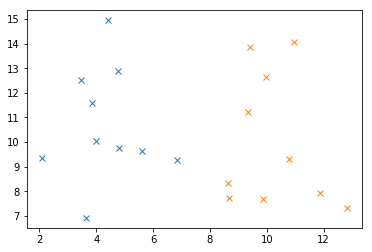

In [34]:
%matplotlib inline
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

#Configuración por defecto
cromosomas=50   #Tamaño de la poblacion (filas) - Cromosomas
genes=50        #Numero de Genes
K=2             #Cluster
eleccion_cruce = 2 #Elección del cruce

print("Inicialmente el algoritmo genetico requiere un tamaño de población (cantidad de cromosomas, cantidad de genes por cromosomas (Datos N) y la cantidad de grupos en los que quiere dividir), estos valores son números enteros\n")
cromosomas = int(input("Introduce la cantidad de cromosomas, población deseada: "))
print ("El numero que ingreso es:\n",cromosomas)
genes = int(input("Introduce la cantidad de genes por cromosoma: "))
print ("El numero que ingreso es:\n",genes)
K = int(input("Introduce la cantidad de clusters en que deseas partir los datos (En su defecto, los datos estan divididos en dos clusters (Asi fueron creados)): "))
print ("El numero que ingreso es:\n",K)
eleccion_cruce = int(input("Introduce 1, 2 ó 3 para elección de curce: 1. Cruce punto. 2. Cruce Multipunto. 3. Cruce Uniforme.: "))
print ("El numero que ingreso es:\n",elección_cruce)

Fitness=[]
indice=[]        #Lista que contiene los indices de los clusters segun cada grupo


#Creación de los datos
mean = [5, 10]            
cov = [[1, 0], [0, 10]]  # diagonal covariance
x1, x2 = np.random.multivariate_normal(mean, cov, int(genes/2)).T
plt.plot(x1, x2, 'x')
X_C1 = np.concatenate((x1[:,None],x2[:,None]),axis=1)  #Concatena [x1,x2] y genera vector de tuplas

mean = [10, 10]
cov = [[1, 0], [0, 10]]  # diagonal covariance
x1, x2 = np.random.multivariate_normal(mean, cov, int(genes/2)).T
plt.plot(x1, x2, 'x')
plt.show()
X_C2 = np.concatenate((x1[:,None],x2[:,None]),axis=1)  #Concatena [x1,x2] y genera vector de tuplas

Xdata = np.concatenate((X_C1,X_C2),axis=0)
#plt.plot(Xdata[:,0], Xdata[:,1], 'x')
#plt.show()

### Generando la matriz población

In [35]:
poblacion=[]
for j in range(cromosomas):
    poblacion.append(np.random.randint(1,K+1,genes))    #Genera vector de etiquetas Random
poblacion=np.array(poblacion)
#print(poblacion)
#print(np.shape(poblacion))    

### Enlazar datos con la matriz población

In [36]:
def IndexEtiq(poblacion,K):
    indice=[]
    for j in range (0,len(poblacion)):
        for i in range(1,K+1):
            indice.append(np.where(poblacion[j,:]==i)[0])
            #print(indice)    #Contiene los indices de cada cluster
            #print(indice[0])
    arreglo_indices=np.array(indice)
    indices=indice
    indice=[]
    #print(indices)
    return indices

indices_final = IndexEtiq(poblacion,K)

### Función Fitness - Función Objetivo

In [37]:
def FuncionObjetivo(cromosomas,K,indices_final,Xdata):
    Fitness=[]
    for c in range(cromosomas):
        fitness_acum=0
        for g in range (K):
            eleccion_grupo=(c*K+g)
            for v1 in range (len(indices_final[eleccion_grupo])):
                for v2 in range (v1,len(indices_final[eleccion_grupo])):
                    a=Xdata[indices_final[eleccion_grupo][v1]]
                    b=Xdata[indices_final[eleccion_grupo][v2]]
                    fitness_acum+=distance.euclidean(a,b)
        #print(fitness_acum)
        fitness_total_cr = 1/fitness_acum
        Fitness.append(fitness_total_cr)
    #print(Fitness)
    return Fitness

### Funciones de Cruce

In [42]:
def CruceDeUnPunto(a,b):
    cruce1 = np.random.randint(0,len(a))#Primer punto de cruce
    #cruce2 = 1+np.random.randint(cruce1,len(a))#Se le suma 1 para que el segundo cruce se haga al menos una posicion más allá 
    print("corte1: ",cruce1)
    temp = np.zeros(len(a))
    print("cromosoma a sin cruzar: ",a)
    print("cromosoma b sin cruzar: ",b)
    temp[cruce1:len(a)] = b[cruce1:len(a)]
    b[cruce1:len(a)] = a[cruce1:len(a)]
    a[cruce1:len(a)]=temp[cruce1:len(a)]
    return a,b

def CruceMultipunto(a,b):
    cruce1 = np.random.randint(0,len(a))#Primer punto de cruce
    cruce2 = 1+np.random.randint(cruce1,len(a))#Se le suma 1 para que el segundo cruce se haga al menos una posicion más allá 
    print("corte1: ",cruce1)
    print("corte2: ",cruce2-1)
    temp = np.zeros(len(a))
    temp[cruce1:cruce2] = b[cruce1:cruce2]
    b[cruce1:cruce2] = a[cruce1:cruce2]
    a[cruce1:cruce2]=temp[cruce1:cruce2]
    return a,b

def CruceUniforme(a,b):
    for i in range (len(a)):
        cruzar=np.random.randint(2)
        if (cruzar==1):
            #print("Cruza! en el gen: ",i)
            temp= a[i]
            a[i] = b[i]
            b[i] = temp 
            #print("vector A cruzado: ",a)
            #print("vector B cruzado: ",b)
        else:
            a[i]=a[i]
            b[i]=b[i]
    return a,b

### Funciones de Mutación

In [43]:
def Mutacion_RandomResetting(a,K):
    gen1_elegido=np.random.randint(0,len(a)) #Se escoge el gen para mutar aleatoriamente 
    print("gen elegido para mutar: ",gen1_elegido)
    resetting=np.random.randint(1,K+1)#mutación
    print("Resetting: ",resetting)
    a[gen1_elegido]=resetting
    #print("cromosoma 'a' mutado: ",a)
    return a

### Wheel - Ruleta ara elección de padres e implementación de los cruces y finalización de iteraccion por generaciones

#### Variables control, variación de generaciones

In [44]:
Tm = 0.4                #Tasa de mutacion 
Tc = 0.4                #Tasa de cruce porcentaje de parejas van a ser seleccionadas para el cruce
N_gen = 20               #Numero de generaciones
mejor_fitness = []       #Lista con los mejores fitness

Poblacion Inicial
[[3 1 1 2 3 1 1 3 2 1 3 2 2 2 1 3 2 3 2 2]
 [1 3 3 2 2 2 2 1 1 1 1 2 2 3 3 3 1 3 2 1]
 [1 2 3 2 2 3 2 3 2 1 3 2 3 3 1 3 1 1 1 1]
 [2 1 2 1 1 1 3 3 3 2 3 2 1 1 3 2 3 2 3 1]
 [3 2 2 2 1 3 2 1 1 1 2 3 2 3 2 1 3 2 3 3]
 [1 3 3 1 1 1 1 3 2 3 2 1 3 2 1 2 1 2 3 1]
 [1 2 3 3 1 1 2 1 2 1 3 2 1 3 1 2 1 2 3 1]
 [3 1 1 3 1 2 2 2 1 3 2 1 2 2 1 2 3 2 3 1]
 [2 3 1 2 1 3 1 3 3 1 3 1 2 2 2 1 1 2 3 2]
 [2 2 2 1 1 2 2 1 3 3 3 3 3 3 1 3 2 3 2 2]
 [2 2 3 2 2 2 2 1 3 1 3 2 3 1 1 2 3 1 2 3]
 [1 3 2 3 2 2 3 2 3 1 1 3 2 3 2 1 3 3 2 1]
 [1 3 1 3 1 2 2 3 2 1 2 1 2 3 2 1 2 1 3 2]
 [2 2 3 1 2 2 3 3 2 1 2 3 1 1 3 3 3 3 1 3]
 [2 1 3 1 3 1 3 1 2 2 3 2 2 1 3 3 3 3 2 2]
 [1 3 3 2 2 2 3 3 3 1 2 1 3 1 1 2 1 3 3 2]
 [3 1 3 3 2 1 2 1 2 2 3 1 2 3 3 3 3 2 2 1]
 [1 2 1 3 1 3 1 3 1 1 2 3 3 1 3 2 2 3 1 2]
 [2 3 1 3 1 3 2 1 1 2 2 2 1 3 3 1 3 1 2 1]
 [2 3 1 3 2 1 3 2 3 3 1 1 1 2 3 3 3 1 1 3]
 [2 1 3 3 1 3 1 2 1 2 3 2 3 2 2 2 1 1 3 2]
 [1 2 2 3 1 3 3 3 2 2 3 3 2 1 3 1 3 2 3 2]
 [3 2 2 3 1 3 3 1 2 1 2 1 3 3 1 3 1 

Poblacion cambio 3
[[3 1 1 ... 3 2 3]
 [2 3 3 ... 1 1 3]
 [3 1 1 ... 3 1 2]
 ...
 [2 3 1 ... 1 1 3]
 [1 3 3 ... 3 3 1]
 [2 3 1 ... 1 2 1]]
gen elegido para mutar:  3
Resetting:  2
Mutacion child1:  [3 3 3 2 2 2 3 3 1 1 1 2 3 2 2 2 1 3 2 2]
Poblacion cambio 3
[[3 1 1 ... 3 2 3]
 [2 3 3 ... 1 1 3]
 [3 1 1 ... 3 1 2]
 ...
 [1 3 3 ... 3 3 1]
 [2 3 1 ... 1 2 1]
 [3 3 3 ... 3 2 2]]
gen elegido para mutar:  1
Resetting:  3
Mutacion child1:  [3 3 1 3 1 2 2 2 3 2 1 3 3 3 2 3 2 3 2 3]
Poblacion cambio 3
[[3 3 1 ... 3 2 3]
 [2 3 3 ... 1 1 3]
 [3 1 1 ... 3 1 2]
 ...
 [2 3 1 ... 1 2 1]
 [3 3 3 ... 3 2 2]
 [3 3 1 ... 3 2 3]]
gen elegido para mutar:  1
Resetting:  3
Mutacion child1:  [3 3 2 3 1 3 3 1 2 1 2 1 3 3 1 3 1 2 1 1]
Poblacion cambio 3
[[3 3 1 ... 3 2 3]
 [2 3 3 ... 1 1 3]
 [3 1 1 ... 3 1 2]
 ...
 [3 3 3 ... 3 2 2]
 [3 3 1 ... 3 2 3]
 [3 3 2 ... 2 1 1]]
gen elegido para mutar:  0
Resetting:  3
Mutacion child1:  [3 3 2 2 3 3 2 1 3 3 3 1 3 3 2 2 2 1 3 1]
Poblacion cambio 3
[[3 3 1 ... 3 2 3]
 [

Poblacion Final
[[2 2 3 ... 3 2 2]
 [3 1 1 ... 3 1 2]
 [2 1 3 ... 1 2 1]
 ...
 [3 1 1 ... 3 1 2]
 [3 3 3 ... 3 2 2]
 [1 3 1 ... 1 2 2]]
gen 1
Poblacion Inicial
[[2 1 3 1 1 1 1 2 1 2 1 2 3 2 3 3 3 3 3 3]
 [2 3 1 1 1 2 1 2 3 1 3 2 2 3 3 1 3 2 3 2]
 [2 3 1 1 1 2 1 2 3 1 3 2 2 3 3 1 3 2 3 2]
 [3 1 1 1 3 1 3 3 2 1 3 2 2 2 1 3 2 3 1 2]
 [3 1 1 1 3 1 3 3 2 1 3 2 2 2 1 3 2 3 1 2]
 [1 2 3 2 2 3 2 3 2 1 3 2 3 3 1 3 1 1 1 1]
 [1 3 3 1 2 1 3 3 2 3 1 1 3 2 1 2 1 2 3 1]
 [1 3 3 1 2 1 3 3 2 3 1 1 3 2 1 2 1 2 3 1]
 [3 1 1 2 3 1 1 3 2 1 3 2 2 2 1 3 2 3 1 2]
 [1 3 2 3 2 3 2 1 1 2 3 2 2 3 3 3 1 1 3 2]
 [3 2 2 2 1 3 2 1 1 1 2 3 2 3 2 1 3 2 3 3]
 [3 2 2 2 1 3 2 1 1 1 2 3 2 3 2 1 3 2 3 3]
 [2 2 3 1 1 2 2 3 2 2 3 1 1 3 1 3 3 3 2 2]
 [2 2 3 1 1 2 2 3 2 2 3 1 1 3 1 3 3 3 2 2]
 [1 2 3 3 2 1 2 1 2 2 1 2 3 3 1 1 1 2 1 3]
 [2 1 1 3 2 2 3 2 1 1 2 3 2 1 3 2 3 2 3 3]
 [2 1 1 3 2 2 3 2 1 1 2 3 2 1 3 2 3 2 3 3]
 [1 3 1 3 1 2 1 3 3 1 2 2 2 3 2 1 1 1 2 2]
 [1 3 1 3 1 2 1 3 3 1 2 2 2 3 2 1 1 1 2 2]
 [1 3 1 3 1 2 1 3 3 1 2

Poblacion Final
[[3 1 1 ... 3 1 2]
 [3 2 3 ... 3 1 2]
 [3 1 3 ... 2 2 1]
 ...
 [3 1 1 ... 3 1 2]
 [1 2 3 ... 1 1 1]
 [1 3 1 ... 1 2 2]]
gen 2
Poblacion Inicial
[[1 3 1 1 1 2 1 2 3 1 3 2 2 3 3 3 2 3 3 2]
 [1 3 1 1 1 2 1 2 3 1 3 2 2 3 3 3 2 3 3 2]
 [1 3 1 1 1 2 1 2 3 1 3 2 2 3 3 3 2 2 3 2]
 [2 1 3 1 1 1 1 2 1 2 1 2 3 2 3 3 3 3 3 3]
 [2 1 1 2 1 3 3 1 1 1 2 3 2 1 3 2 3 2 3 3]
 [2 1 1 2 1 3 3 1 1 1 2 3 2 1 3 2 3 2 3 3]
 [2 3 1 1 1 2 1 2 2 1 3 2 2 3 3 1 3 2 3 2]
 [2 3 1 1 1 2 1 2 2 1 3 2 2 3 3 1 3 2 3 2]
 [1 3 2 3 1 2 3 2 2 1 1 3 3 3 1 1 1 3 2 2]
 [1 3 2 3 1 2 3 2 2 1 1 3 3 3 1 1 1 3 2 2]
 [2 1 1 1 3 1 2 3 2 1 3 1 2 2 1 3 3 3 2 2]
 [2 1 1 1 3 1 2 3 2 1 3 1 2 2 1 3 3 3 2 2]
 [3 1 1 1 3 1 3 3 2 1 3 2 2 2 1 3 2 3 1 2]
 [1 3 2 1 1 1 2 3 1 2 1 3 2 3 2 2 3 3 3 1]
 [1 3 2 1 1 1 2 3 1 2 1 3 2 3 2 2 3 3 3 1]
 [1 3 3 1 2 1 3 3 2 3 1 1 3 2 1 2 1 2 3 1]
 [3 2 2 2 1 3 2 1 1 1 2 3 2 3 2 1 3 2 3 3]
 [3 1 1 2 3 1 1 3 2 1 3 2 2 3 1 3 2 3 1 2]
 [3 1 1 2 3 1 1 3 2 1 3 2 2 3 1 3 2 3 1 2]
 [1 3 2 3 2 3 2 1 1 2 3

Poblacion Final
[[1 3 2 ... 3 2 2]
 [2 1 1 ... 2 3 2]
 [1 3 2 ... 3 2 2]
 ...
 [1 3 2 ... 3 2 2]
 [2 1 1 ... 3 2 2]
 [1 3 1 ... 1 2 2]]
gen 3
Poblacion Inicial
[[1 3 1 1 1 2 1 2 3 1 3 2 2 3 3 3 2 3 3 2]
 [1 3 1 1 1 2 1 2 3 1 3 2 2 3 3 3 2 3 3 2]
 [1 3 1 1 1 2 1 2 3 1 3 2 2 3 3 3 2 2 3 2]
 [2 1 3 1 1 1 1 2 1 2 1 2 2 2 3 3 3 3 3 3]
 [2 1 3 1 1 1 1 2 1 2 1 2 2 2 3 3 3 3 3 3]
 [3 1 1 1 1 1 1 2 2 1 3 2 2 3 3 1 2 3 1 2]
 [2 1 1 2 1 3 3 1 1 1 2 3 2 1 3 2 3 2 3 3]
 [2 3 2 1 1 2 2 1 3 1 3 3 3 3 1 1 2 3 3 2]
 [2 3 2 1 1 2 2 1 3 1 3 3 3 3 1 1 2 3 3 2]
 [2 1 1 1 3 1 2 3 2 1 3 1 2 2 1 3 3 3 2 2]
 [2 1 1 1 3 1 2 3 2 1 3 1 2 2 1 3 3 3 2 2]
 [3 1 1 1 1 1 1 2 2 1 3 2 2 2 3 1 2 3 1 2]
 [3 1 1 1 1 1 1 2 2 1 3 2 2 2 3 1 2 3 1 2]
 [2 1 1 2 3 3 1 1 1 1 3 2 2 3 1 3 3 2 3 2]
 [2 1 1 2 3 3 1 1 1 1 3 2 2 3 1 3 3 2 3 2]
 [3 1 1 1 3 1 3 3 2 1 3 2 2 2 1 3 2 3 1 2]
 [1 3 1 3 1 2 2 3 3 1 2 2 2 3 2 1 1 1 2 2]
 [1 3 1 3 1 2 2 3 3 1 2 2 2 3 2 1 1 1 2 2]
 [1 3 2 1 1 1 2 3 1 2 1 3 2 3 2 2 3 3 3 1]
 [1 3 2 1 1 1 2 3 1 2 1

Poblacion Final
[[1 3 2 ... 1 3 2]
 [2 1 1 ... 2 3 3]
 [1 3 2 ... 3 2 2]
 ...
 [1 3 1 ... 1 2 2]
 [1 3 3 ... 3 2 2]
 [2 1 1 ... 3 2 2]]
gen 4
Poblacion Inicial
[[3 2 1 1 1 1 3 1 1 1 2 3 2 3 2 3 3 3 3 3]
 [3 2 1 1 1 1 3 1 1 1 2 3 2 3 2 3 3 3 3 3]
 [1 3 1 1 1 1 3 2 3 1 3 2 2 3 3 3 2 3 2 2]
 [1 3 1 1 1 2 1 2 3 1 3 2 2 3 3 3 2 3 3 2]
 [1 3 1 1 1 2 1 2 3 1 3 2 2 3 3 3 2 2 3 2]
 [2 1 3 1 1 1 1 2 1 2 1 2 2 2 3 3 3 3 3 3]
 [3 1 1 1 1 1 1 2 2 1 3 2 2 3 3 1 2 3 1 2]
 [2 3 2 1 1 2 2 1 3 1 3 3 3 3 1 1 2 3 3 2]
 [2 3 2 1 1 2 2 1 3 1 3 3 3 3 1 1 2 3 3 2]
 [2 1 2 3 1 3 3 1 1 1 2 3 3 3 3 2 1 2 2 2]
 [2 1 2 3 1 3 3 1 1 1 2 3 3 3 3 2 1 2 2 2]
 [1 3 1 3 1 1 2 2 3 1 3 2 2 2 2 1 1 3 3 2]
 [1 3 1 3 1 1 2 2 3 1 3 2 2 2 2 1 1 3 3 2]
 [2 1 1 1 3 1 1 3 2 1 3 2 2 2 1 3 3 3 3 3]
 [3 1 1 1 1 1 1 2 2 1 3 2 2 2 3 1 2 3 1 2]
 [2 1 1 2 3 3 1 1 1 1 3 2 2 3 1 3 3 2 3 2]
 [2 1 1 2 3 3 1 1 1 1 3 2 2 3 1 3 3 2 3 2]
 [1 3 2 3 1 2 1 2 2 1 1 3 2 3 1 1 1 3 3 2]
 [1 3 2 3 1 2 1 2 2 1 1 3 2 3 1 1 1 3 3 2]
 [1 3 2 1 1 1 2 3 1 2 1

Poblacion Final
[[1 3 2 ... 1 3 2]
 [2 1 1 ... 3 3 2]
 [3 1 1 ... 3 1 2]
 ...
 [2 1 2 ... 2 2 2]
 [3 1 3 ... 3 2 1]
 [2 1 3 ... 3 3 3]]
gen 5
Poblacion Inicial
[[2 1 1 1 1 1 1 3 2 1 3 2 3 3 3 2 3 3 3 2]
 [2 1 1 1 1 1 1 3 2 1 3 2 3 3 3 2 3 3 3 2]
 [3 2 1 1 1 1 3 1 1 1 2 3 2 3 2 3 3 3 3 3]
 [3 2 1 1 1 1 3 1 1 1 2 3 2 3 2 3 3 3 3 3]
 [1 3 1 1 1 2 1 2 3 1 3 2 2 3 3 3 2 3 3 2]
 [1 3 1 1 1 2 1 2 3 1 3 2 2 3 3 3 2 2 3 2]
 [2 1 1 1 3 1 1 3 2 1 2 1 2 3 3 3 3 3 2 2]
 [1 3 2 1 1 2 2 1 3 1 1 3 2 3 2 1 2 3 3 2]
 [1 3 2 1 1 2 2 1 3 1 1 3 2 3 2 1 2 3 3 2]
 [1 3 1 3 1 1 3 3 3 1 3 2 2 2 2 1 2 3 3 2]
 [1 3 1 3 1 1 3 3 3 1 3 2 2 2 2 1 2 3 3 2]
 [2 1 1 1 3 1 1 3 2 1 2 2 2 3 1 3 3 3 3 2]
 [2 1 1 1 3 1 1 3 2 1 2 2 2 3 1 3 3 3 3 2]
 [2 1 3 1 1 1 1 2 1 2 1 2 2 2 3 3 3 3 3 3]
 [2 1 3 1 1 1 1 2 1 2 1 2 2 2 3 3 3 3 3 3]
 [3 1 1 1 1 1 1 2 2 1 3 2 2 3 3 1 2 3 1 2]
 [2 1 1 1 3 1 1 3 2 1 3 1 2 2 3 3 3 3 2 3]
 [2 1 1 1 3 1 1 3 2 1 3 1 2 2 3 3 3 3 2 3]
 [1 3 1 3 1 2 3 2 2 1 3 2 2 3 3 3 1 3 2 2]
 [1 3 1 3 1 2 3 2 2 1 3

Poblacion Final
[[2 1 1 ... 3 3 1]
 [1 3 1 ... 3 3 2]
 [1 3 2 ... 3 3 1]
 ...
 [2 1 3 ... 3 3 2]
 [2 1 1 ... 3 2 3]
 [2 1 1 ... 3 2 2]]
gen 6
Poblacion Inicial
[[1 2 1 1 1 1 3 2 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 3 2 1 1 2 3 2 3 3 3 2 3 3 2]
 [2 1 1 1 1 1 1 3 2 1 3 2 3 3 3 2 3 3 3 2]
 [3 2 1 1 1 1 1 1 1 1 3 2 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 3 3 3 1 2 2 2 3 2 3 2 3 3 3]
 [1 3 1 1 1 1 1 2 1 1 3 3 2 3 2 2 3 3 3 2]
 [1 3 1 1 1 1 1 2 1 1 3 3 2 3 2 2 3 3 3 2]
 [3 2 1 1 1 1 3 1 1 1 2 3 2 3 2 1 2 3 3 2]
 [1 3 1 1 1 2 2 2 2 1 3 3 3 3 1 3 1 3 3 2]
 [1 3 1 1 1 2 2 2 2 1 3 3 3 3 1 3 1 3 3 2]
 [1 3 2 1 1 2 2 1 1 2 1 3 2 3 2 3 3 3 3 3]
 [1 3 2 1 1 2 2 1 1 2 1 3 2 3 2 3 3 3 3 3]
 [1 2 1 1 1 3 3 3 3 1 2 2 2 3 2 3 2 3 3 3]
 [1 2 1 1 1 3 3 3 3 1 2 2 2 3 2 3 2 3 3 3]
 [2 1 1 1 2 1 1 3 2 1 2 2 2 3 2 3 3 3 3 2]
 [2 1 1 1 2 1 1 3 2 1 2 2 2 3 2 3 3 3 3 2]
 [1 3 1 1 1 2 3 2 3 1 2 3 2 3 2 1 2 2 3 2]
 [2 1 1 1 2 1 1 3 2 1 2 2 2 3 1 3 3 3 3 2]
 [3 3 1 1 1 3 1 1 3 1 3 2 2 3 2 1 2 2 3 2]
 [3 3 1 1 1 3 1 1 3 1 3

Mutacion child1:  [1 3 1 1 3 1 1 3 2 1 2 1 2 3 3 3 3 3 2 2]
Poblacion cambio 3
[[1 3 1 ... 2 3 2]
 [3 3 1 ... 3 1 2]
 [2 1 1 ... 3 3 1]
 ...
 [1 2 3 ... 3 3 3]
 [1 1 1 ... 3 2 2]
 [1 3 1 ... 3 2 2]]
gen elegido para mutar:  11
Resetting:  2
Mutacion child1:  [1 3 2 1 1 2 2 1 1 2 1 2 2 3 2 3 3 3 3 3]
Poblacion cambio 3
[[1 3 1 ... 2 3 2]
 [3 3 1 ... 3 1 2]
 [2 1 1 ... 3 3 1]
 ...
 [1 1 1 ... 3 2 2]
 [1 3 1 ... 3 2 2]
 [1 3 2 ... 3 3 3]]
gen elegido para mutar:  5
Resetting:  2
Mutacion child1:  [2 1 1 1 1 2 1 3 2 1 3 2 3 3 1 2 3 3 3 1]
Poblacion cambio 3
[[1 3 1 ... 2 3 2]
 [3 3 1 ... 3 1 2]
 [2 1 1 ... 3 3 1]
 ...
 [1 3 1 ... 3 2 2]
 [1 3 2 ... 3 3 3]
 [2 1 1 ... 3 3 1]]
gen elegido para mutar:  3
Resetting:  2
Mutacion child1:  [2 1 1 2 1 1 1 3 2 1 3 2 3 3 3 2 3 3 3 2]
Poblacion cambio 3
[[1 3 1 ... 2 3 2]
 [3 3 1 ... 3 1 2]
 [2 1 1 ... 3 3 1]
 ...
 [1 3 2 ... 3 3 3]
 [2 1 1 ... 3 3 1]
 [2 1 1 ... 3 3 2]]
gen elegido para mutar:  1
Resetting:  1
Mutacion child1:  [1 1 1 1 1 2 3 2 3 1 

[[3 3 1 ... 3 3 2]
 [1 2 2 ... 3 3 2]
 [3 3 1 ... 2 3 2]
 ...
 [1 2 1 ... 3 3 2]
 [1 1 1 ... 2 3 2]
 [3 3 1 ... 2 3 2]]
gen elegido para mutar:  8
Resetting:  2
Mutacion child1:  [2 1 1 2 1 1 1 3 2 1 3 2 3 3 3 2 3 3 3 2]
Poblacion cambio 3
[[3 3 1 ... 3 3 2]
 [1 2 2 ... 3 3 2]
 [3 3 1 ... 2 3 2]
 ...
 [1 1 1 ... 2 3 2]
 [3 3 1 ... 2 3 2]
 [2 1 1 ... 3 3 2]]
gen elegido para mutar:  0
Resetting:  3
Mutacion child1:  [3 2 1 1 1 1 3 1 1 1 2 3 2 3 2 1 2 3 3 2]
Poblacion cambio 3
[[3 3 1 ... 3 3 2]
 [1 2 2 ... 3 3 2]
 [3 3 1 ... 2 3 2]
 ...
 [3 3 1 ... 2 3 2]
 [2 1 1 ... 3 3 2]
 [3 2 1 ... 3 3 2]]
gen elegido para mutar:  0
Resetting:  3
Mutacion child1:  [3 3 2 1 1 2 2 1 1 2 1 2 2 3 2 3 3 3 3 3]
Poblacion cambio 3
[[3 3 1 ... 3 3 2]
 [1 2 2 ... 3 3 2]
 [3 3 1 ... 2 3 2]
 ...
 [2 1 1 ... 3 3 2]
 [3 2 1 ... 3 3 2]
 [3 3 2 ... 3 3 3]]
gen elegido para mutar:  4
Resetting:  2
Mutacion child1:  [2 1 1 1 2 1 1 3 2 1 2 2 2 3 1 3 3 3 3 2]
Poblacion cambio 3
[[3 3 1 ... 3 3 2]
 [1 2 2 ... 3 3 2]
 [

 [1 3 1 ... 3 3 2]]
Poblacion Final
[[3 2 2 ... 3 3 2]
 [1 3 1 ... 3 2 3]
 [3 3 1 ... 3 1 2]
 ...
 [1 3 1 ... 2 3 2]
 [2 3 2 ... 3 2 3]
 [1 3 1 ... 3 3 2]]
gen 9
Poblacion Inicial
[[1 2 1 1 1 1 3 2 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 3 2 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 3 2 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 3 3 1 1 2 2 2 3 2 3 2 3 3 2]
 [3 3 1 1 1 1 1 1 1 1 3 3 2 2 2 2 2 3 3 2]
 [3 3 1 1 1 1 1 1 1 1 3 3 2 2 2 2 2 3 3 2]
 [3 3 1 1 1 1 1 1 1 1 3 3 2 2 2 2 2 3 3 2]
 [1 3 1 1 1 2 2 1 2 1 1 3 2 3 2 3 3 3 3 2]
 [1 3 1 1 1 2 2 1 2 1 1 3 2 3 2 3 3 3 3 2]
 [1 3 1 1 1 2 2 1 2 1 3 3 2 3 2 3 3 2 3 2]
 [1 3 1 1 1 2 2 1 2 1 3 3 2 3 2 3 3 2 3 2]
 [3 2 1 1 1 1 3 1 1 1 2 3 2 3 2 1 2 3 3 2]
 [3 2 1 1 1 1 3 1 1 1 2 3 2 3 2 1 2 3 3 2]
 [2 1 1 2 1 1 1 3 2 1 3 2 3 3 3 2 3 3 3 2]
 [2 1 1 2 1 1 1 3 2 1 3 2 3 3 3 2 3 3 3 2]
 [2 1 1 2 1 1 1 3 2 1 3 2 3 3 3 2 3 3 3 2]
 [1 3 1 1 1 2 2 2 2 1 3 3 3 3 1 3 1 3 3 2]
 [1 3 1 1 1 1 2 2 3 1 3 2 2 3 2 3 3 3 2 2]
 [1 3 1 1 1 1 2 2 3 1 3 2 2 3 2 3 3 3 2 2]
 [3

Poblacion len
53
[[1 2 1 ... 3 3 2]
 [2 1 1 ... 3 3 2]
 [1 3 1 ... 3 2 3]
 ...
 [3 3 1 ... 3 3 2]
 [1 1 1 ... 3 2 3]
 [2 3 1 ... 3 3 2]]
Parent1: 
[2 1 1 1 2 1 1 3 2 1 3 1 2 2 3 3 3 3 2 3]
Parent2: 
[1 2 1 1 1 3 3 3 3 1 2 2 2 3 2 3 2 3 3 2]
Child_1
[2 1 1 1 2 3 3 3 2 1 2 2 2 2 2 3 3 3 2 3]
Child_2
[1 2 1 1 1 1 1 3 3 1 3 1 2 3 3 3 2 3 3 2]
Poblacion len
55
[[1 2 1 ... 3 3 2]
 [2 1 1 ... 3 3 2]
 [1 3 1 ... 3 2 3]
 ...
 [2 3 1 ... 3 3 2]
 [2 1 1 ... 3 2 3]
 [1 2 1 ... 3 3 2]]
gen elegido para mutar:  7
Resetting:  1
Mutacion child1:  [1 3 1 1 1 2 2 1 2 1 3 2 2 3 2 1 3 2 3 2]
Poblacion cambio 3
[[1 2 1 ... 3 3 2]
 [2 1 1 ... 3 3 2]
 [1 3 1 ... 3 2 3]
 ...
 [2 1 1 ... 3 2 3]
 [1 2 1 ... 3 3 2]
 [1 3 1 ... 2 3 2]]
gen elegido para mutar:  17
Resetting:  2
Mutacion child1:  [3 2 1 1 1 1 3 1 1 1 2 3 2 3 2 1 2 2 3 2]
Poblacion cambio 3
[[1 2 1 ... 3 3 2]
 [2 1 1 ... 3 3 2]
 [1 3 1 ... 3 2 3]
 ...
 [1 2 1 ... 3 3 2]
 [1 3 1 ... 2 3 2]
 [3 2 1 ... 2 3 2]]
gen elegido para mutar:  15
Resetting:  3

Poblacion Final
[[1 3 1 ... 3 3 2]
 [2 2 2 ... 3 3 2]
 [1 2 1 ... 2 3 2]
 ...
 [3 3 1 ... 2 3 2]
 [1 2 1 ... 3 3 2]
 [1 3 1 ... 3 3 2]]
gen 11
Poblacion Inicial
[[1 2 1 1 1 1 3 2 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 3 3 1 1 2 2 2 3 2 3 2 3 3 2]
 [2 3 1 1 1 1 1 1 1 1 3 2 2 3 3 2 3 3 3 2]
 [3 3 1 1 1 1 1 1 1 1 3 3 2 2 2 2 2 3 3 2]
 [1 3 1 1 1 1 1 1 2 1 3 3 2 3 2 2 3 3 3 2]
 [1 3 1 1 1 1 1 1 2 1 3 3 2 3 2 2 3 3 3 2]
 [1 3 1 1 1 2 2 1 2 1 3 3 2 3 1 3 2 3 3 2]
 [1 3 1 1 1 2 2 1 2 1 3 3 3 3 2 3 2 2 3 2]
 [3 1 1 1 1 1 2 2 2 1 2 3 2 3 2 3 2 3 3 2]
 [1 1 1 1 1 1 1 1 2 1 3 3 2 3 3 3 3 2 3 3]
 [1 1 1 1 1 1 1 1 2 1 3 3 2 3 3 3 3 2 3 3]
 [1 3 1 1 2 1 2 1 1 1 3 3 2 3 2 3 3 3 3 2]
 [1 3 1 1 1 2 2 1 2 1 1 3 2 3 2 3 3 3 3 2]
 [3 3 1 1 1 2 2 1 1 1 3 3 3 2 2 2 3 2 3 2]
 [1 1 1 1 1 2 2 1 2 1 3 1 2 3 3 3 3 3 2 3]
 [1 2 1 1 1 1 3 2 1 1 2 3 2 3 3 3 1 3 3 2]
 [1 2 1 1 1 1 3 2 1 1 2 3 2 3 3 3 1 3 3 2]
 [3 2 1 1 1 1 3 1 1 1 2 3 2 3 2 1 2 3 3 2]
 [1 3 1 1 1 1 1 1 1 1 3 3 2 3 2 2 3 3 3 2]
 [2 1 1 2 1 1 1 3 2 1 

Poblacion Final
[[1 3 1 ... 3 3 2]
 [3 3 1 ... 2 3 2]
 [3 2 1 ... 3 3 2]
 ...
 [1 2 2 ... 3 3 2]
 [1 2 1 ... 3 3 2]
 [2 3 1 ... 3 3 2]]
gen 12
Poblacion Inicial
[[1 2 2 1 1 1 2 1 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 2 1 1 1 2 1 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 1 1 2 1 2 2 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 1 1 2 1 2 2 2 3 3 3 2 3 3 2]
 [1 1 1 1 1 1 1 2 2 1 3 3 2 3 2 3 2 2 3 3]
 [1 1 1 1 1 1 1 2 2 1 3 3 2 3 2 3 2 2 3 3]
 [1 2 1 1 1 1 3 2 1 1 2 3 2 3 3 2 2 3 3 2]
 [1 2 1 1 1 1 3 2 1 1 2 3 2 3 3 2 2 3 3 2]
 [2 3 1 1 1 1 1 1 1 1 3 2 2 3 3 2 3 3 3 2]
 [1 2 2 1 1 1 2 2 1 1 2 3 3 3 3 2 3 3 3 2]
 [1 2 2 1 1 1 2 2 1 1 2 3 3 3 3 2 3 3 3 2]
 [2 1 1 1 1 1 3 1 2 1 3 3 2 3 3 2 3 2 3 3]
 [2 1 1 1 1 1 3 1 2 1 3 3 2 3 3 2 3 2 3 3]
 [1 3 1 1 1 1 1 3 1 1 3 2 2 3 2 2 3 3 2 2]
 [3 3 1 1 1 1 1 1 1 1 3 3 2 2 2 2 2 3 3 2]
 [1 3 1 1 1 1 1 1 2 1 3 3 2 3 2 2 3 3 3 2]
 [1 3 1 1 1 1 1 1 2 1 3 3 2 3 2 2 3 3 3 2]
 [3 3 1 1 1 1 2 1 1 1 3 3 2 2 2 2 3 3 3 2]
 [1 3 1 1 1 2 2 1 2 1 3 3 2 3 1 3 2 3 3 2]
 [1 2 1 1 1 1 3 3 1 1 

Poblacion Final
[[3 1 1 ... 3 3 2]
 [3 3 1 ... 3 3 2]
 [3 3 1 ... 3 3 2]
 ...
 [1 2 3 ... 3 3 2]
 [1 2 2 ... 3 3 2]
 [3 3 1 ... 3 3 2]]
gen 13
Poblacion Inicial
[[1 3 1 1 1 2 2 1 2 1 2 3 2 3 2 3 2 3 3 3]
 [1 3 1 1 1 2 2 1 2 1 2 3 2 3 2 3 2 3 3 3]
 [1 2 2 1 1 1 2 1 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 2 1 1 1 2 1 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 1 1 2 1 2 2 2 3 3 3 2 3 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 2 2 2 2 3 2 3 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 2 2 2 2 3 2 3 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 3 2 3 3 2 3 2 3 2]
 [1 3 1 1 1 2 2 1 2 1 1 3 2 3 2 3 2 3 3 3]
 [1 3 1 1 1 2 2 1 2 1 1 3 2 3 2 3 2 3 3 3]
 [1 3 1 1 1 1 2 1 2 1 3 3 2 3 2 3 2 2 3 2]
 [1 3 1 1 1 1 2 1 2 1 3 3 2 3 2 3 2 2 3 2]
 [1 3 1 1 1 1 1 1 1 1 3 2 2 3 3 2 2 3 3 2]
 [1 3 1 1 1 1 1 1 1 1 3 2 2 3 3 2 2 3 3 2]
 [1 2 2 1 1 1 2 2 1 1 2 3 3 3 3 2 3 3 3 2]
 [1 2 2 1 1 1 2 2 1 1 2 3 3 3 3 2 3 3 3 2]
 [1 2 2 1 1 1 2 2 1 1 2 3 3 3 3 2 3 3 3 2]
 [1 1 1 1 1 1 1 1 1 1 2 3 2 3 3 2 3 2 3 2]
 [1 1 1 1 1 1 1 1 1 1 2 3 2 3 3 2 3 2 3 2]
 [1 1 1 1 1 1 1 1 1 1 

Poblacion Final
[[1 1 1 ... 2 3 2]
 [1 3 1 ... 3 3 2]
 [2 2 1 ... 3 3 1]
 ...
 [1 3 1 ... 3 3 3]
 [1 1 1 ... 3 3 1]
 [1 3 1 ... 2 3 2]]
gen 14
Poblacion Inicial
[[1 3 1 1 1 2 2 1 2 1 2 3 2 3 2 3 2 3 3 3]
 [1 3 1 1 1 2 2 1 2 1 2 3 2 3 2 3 2 3 3 3]
 [1 2 2 1 1 1 2 1 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 2 1 1 1 2 1 1 1 2 3 2 3 3 3 2 3 3 2]
 [2 1 1 1 1 1 2 2 1 1 3 3 3 3 2 2 3 3 3 3]
 [2 1 1 1 1 1 2 2 1 1 3 3 3 3 2 2 3 3 3 3]
 [1 1 1 1 1 1 2 1 2 1 3 3 2 3 2 3 3 2 3 2]
 [1 1 1 1 1 1 2 1 2 1 3 3 2 3 2 3 3 2 3 2]
 [1 3 1 1 1 1 2 1 2 1 3 3 2 3 2 3 2 2 3 3]
 [1 2 1 1 1 1 3 1 2 1 3 3 2 3 3 2 3 2 3 2]
 [1 2 1 1 1 1 3 1 2 1 3 3 2 3 3 2 3 2 3 2]
 [1 2 1 1 1 1 1 1 2 1 2 2 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 1 1 2 1 2 2 2 3 3 3 2 3 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 2 2 2 2 3 2 3 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 3 2 3 3 2 3 2 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 3 2 3 3 2 3 2 3 2]
 [1 1 1 1 1 1 1 2 1 1 3 2 2 3 3 2 3 2 3 2]
 [1 1 1 1 1 1 1 2 1 1 3 2 2 3 3 2 3 2 3 2]
 [1 1 1 1 1 2 2 1 2 1 3 3 2 3 3 3 3 2 2 2]
 [1 1 1 1 1 2 2 1 2 1 

Poblacion Final
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 3 2]
 [1 1 1 ... 3 3 2]
 ...
 [2 3 1 ... 3 3 3]
 [1 3 1 ... 3 3 2]
 [1 1 1 ... 3 3 2]]
gen 15
Poblacion Inicial
[[1 3 1 1 1 2 2 1 2 1 2 3 2 3 2 3 2 3 3 3]
 [1 1 1 1 1 1 2 1 2 1 3 3 2 3 2 3 3 3 3 2]
 [1 1 1 1 1 1 2 1 2 1 3 3 2 3 2 3 3 3 3 2]
 [1 2 1 1 1 1 2 1 2 1 3 3 2 3 3 3 3 2 3 2]
 [1 2 1 1 1 1 2 1 2 1 3 3 2 3 3 3 3 2 3 2]
 [1 2 2 1 1 1 2 1 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 2 1 1 1 2 1 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 3 2 2 3 2 3 2 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 3 2 2 3 2 3 2 3 2]
 [1 2 1 1 1 1 2 2 1 1 2 3 2 3 2 3 1 3 3 3]
 [1 2 1 1 1 1 2 2 1 1 2 3 2 3 2 3 1 3 3 3]
 [2 1 1 1 1 1 2 2 1 1 3 3 3 3 2 2 3 3 3 3]
 [2 1 1 1 1 1 2 2 1 1 3 3 3 3 2 2 3 3 3 3]
 [1 3 1 1 1 1 2 1 2 1 3 3 2 3 2 3 2 2 3 3]
 [1 2 1 1 1 1 2 2 2 1 3 3 2 3 3 3 3 3 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 2 2 2 2 3 2 3 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 2 2 2 2 3 2 3 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 3 2 3 3 2 2 2 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 3 2 3 3 2 2 2 3 2]
 [1 2 1 1 1 1 3 1 1 1 

[[1 1 1 ... 3 3 2]
 [1 2 1 ... 2 3 3]
 [1 2 1 ... 2 3 2]
 ...
 [2 1 2 ... 3 3 1]
 [1 3 1 ... 2 3 3]
 [1 2 1 ... 2 3 2]]
gen elegido para mutar:  14
Resetting:  2
Mutacion child1:  [1 1 1 1 1 2 2 1 2 1 3 3 2 3 2 3 3 2 2 2]
Poblacion cambio 3
[[1 1 1 ... 3 3 2]
 [1 2 1 ... 2 3 3]
 [1 2 1 ... 2 3 2]
 ...
 [1 3 1 ... 2 3 3]
 [1 2 1 ... 2 3 2]
 [1 1 1 ... 2 2 2]]
gen elegido para mutar:  0
Resetting:  1
Mutacion child1:  [1 3 1 2 1 1 2 1 2 1 3 3 2 3 2 3 2 2 3 3]
Poblacion cambio 3
[[1 1 1 ... 3 3 2]
 [1 2 1 ... 2 3 3]
 [1 2 1 ... 2 3 2]
 ...
 [1 2 1 ... 2 3 2]
 [1 1 1 ... 2 2 2]
 [1 3 1 ... 2 3 3]]
gen elegido para mutar:  19
Resetting:  3
Mutacion child1:  [1 1 1 1 1 1 2 1 2 1 3 2 2 3 2 3 2 3 3 3]
Poblacion cambio 3
[[1 1 1 ... 3 3 2]
 [1 2 1 ... 2 3 3]
 [1 2 1 ... 2 3 2]
 ...
 [1 1 1 ... 2 2 2]
 [1 3 1 ... 2 3 3]
 [1 1 1 ... 3 3 3]]
gen elegido para mutar:  12
Resetting:  2
Mutacion child1:  [2 1 2 1 1 1 2 1 1 1 3 3 2 3 3 2 3 3 3 2]
Poblacion cambio 3
[[1 1 1 ... 3 3 2]
 [1 2 1 ... 2 3 3]

Poblacion Final
[[1 1 1 ... 3 3 2]
 [1 2 1 ... 3 2 3]
 [1 1 1 ... 3 3 2]
 ...
 [1 2 1 ... 3 3 2]
 [2 1 1 ... 3 1 2]
 [1 2 1 ... 3 3 2]]
gen 17
Poblacion Inicial
[[1 1 1 1 1 1 2 1 2 1 3 2 2 3 2 3 2 3 3 3]
 [1 1 1 1 1 1 2 1 2 1 3 2 2 3 2 3 2 3 3 3]
 [1 2 1 1 1 1 2 1 1 1 2 3 2 3 2 3 3 3 3 2]
 [1 2 1 1 1 1 2 1 1 1 2 3 2 3 2 3 3 3 3 2]
 [1 3 1 1 1 1 2 1 2 1 2 3 2 3 2 3 2 3 3 2]
 [1 3 1 1 1 2 2 1 2 1 2 3 2 3 2 3 2 3 3 3]
 [1 1 1 1 1 1 2 1 2 1 3 2 2 3 3 2 2 3 3 3]
 [1 1 1 1 1 1 2 1 2 1 3 2 2 3 3 2 2 3 3 3]
 [1 2 1 1 1 1 2 1 2 1 3 3 2 3 3 3 3 3 3 2]
 [1 2 1 1 1 1 2 1 2 1 3 3 2 3 3 3 3 3 3 2]
 [1 2 1 1 1 1 3 1 2 1 2 3 2 3 3 3 2 3 3 2]
 [1 2 1 1 1 1 3 1 2 1 2 3 2 3 3 3 2 3 3 2]
 [1 1 1 1 1 1 2 1 2 1 2 3 3 3 3 2 3 3 3 2]
 [1 1 1 1 1 1 2 1 2 1 2 3 3 3 3 2 3 3 3 2]
 [1 2 2 1 1 1 2 1 1 1 2 3 2 3 3 3 2 3 3 2]
 [1 1 1 1 1 1 3 1 1 1 2 3 2 2 3 2 3 2 3 2]
 [1 2 1 1 1 1 2 2 1 1 2 3 2 3 2 3 1 3 3 3]
 [1 2 1 1 1 1 2 2 1 1 2 3 2 3 2 3 1 3 3 3]
 [1 1 1 1 1 1 1 2 1 1 3 2 3 3 3 2 3 2 3 2]
 [1 1 1 1 1 1 1 2 1 1 

gen elegido para mutar:  17
Resetting:  2
Mutacion child1:  [1 2 1 1 1 1 2 1 2 1 3 3 2 3 3 3 3 2 2 3]
Poblacion cambio 3
[[1 1 2 ... 3 3 3]
 [1 3 1 ... 3 3 2]
 [1 2 1 ... 2 2 3]
 ...
 [2 1 1 ... 3 3 2]
 [2 1 1 ... 3 3 3]
 [1 2 1 ... 2 2 3]]
gen elegido para mutar:  4
Resetting:  3
Mutacion child1:  [1 1 1 1 3 1 2 1 1 1 3 3 2 3 2 3 3 3 3 3]
Poblacion cambio 3
[[1 1 2 ... 3 3 3]
 [1 3 1 ... 3 3 2]
 [1 2 1 ... 2 2 3]
 ...
 [2 1 1 ... 3 3 3]
 [1 2 1 ... 2 2 3]
 [1 1 1 ... 3 3 3]]
gen elegido para mutar:  12
Resetting:  3
Mutacion child1:  [1 1 1 1 1 1 2 1 2 1 2 3 3 3 3 2 3 3 3 2]
Poblacion cambio 3
[[1 1 2 ... 3 3 3]
 [1 3 1 ... 3 3 2]
 [1 2 1 ... 2 2 3]
 ...
 [1 2 1 ... 2 2 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 2]]
gen elegido para mutar:  16
Resetting:  1
Mutacion child1:  [2 2 1 1 1 1 2 1 1 1 3 3 2 3 3 2 1 2 3 2]
Poblacion cambio 3
[[1 1 2 ... 3 3 3]
 [1 3 1 ... 3 3 2]
 [1 2 1 ... 2 2 3]
 ...
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 2]
 [2 2 1 ... 2 3 2]]
gen elegido para mutar:  19
Resetting

Poblacion Final
[[2 2 3 ... 3 3 2]
 [1 1 1 ... 3 3 2]
 [2 1 1 ... 3 3 2]
 ...
 [1 1 1 ... 3 2 2]
 [1 2 1 ... 3 3 2]
 [1 1 2 ... 3 2 2]]
gen 19


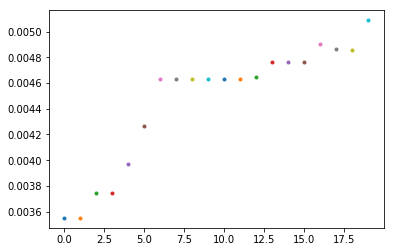

In [45]:
for gen in range(N_gen):
    
    print("Poblacion Inicial")
    
    print(poblacion)
    
    # Fitness evaluation
    Fitness = np.array(FuncionObjetivo(cromosomas,K,indices_final,Xdata))
    #print(Fitness)
    BestIndividuos = np.argsort(-Fitness)
    
    print("Poblacion Cambio 1")
    
    poblacion = poblacion[BestIndividuos]
    
    print(poblacion)
    
    Wheel = np.cumsum(Fitness[BestIndividuos])/np.sum(Fitness[BestIndividuos])
    
    # Crossover - Wheel 
    
    for parent in range(int(Tc*cromosomas/2)):
        P = np.random.rand(1)
        ParentSelected_1 = np.where(Wheel >= P)[0][0]
        print("Parent1: ")        
        print(poblacion[ParentSelected_1])
        
        P = np.random.rand(1)
        ParentSelected_2 = np.where(Wheel >= P)[0][0]
        print("Parent2: ")        
        print(poblacion[ParentSelected_2])
        
        #Crossover Aritmetic recombination
        #Child_1 = (1-alpha)*poblacion[ParentSelected_1] + alpha*poblacion[ParentSelected_2]
        #Child_2 = alpha*poblacion[ParentSelected_1] + (1-alpha)*poblacion[ParentSelected_2]
        
        #Elección Cruce
        if(eleccion_cruce==1):
            Child_1 ,Child_2 = CruceDeUnPunto(poblacion[ParentSelected_1],poblacion[ParentSelected_2])
        elif(eleccion_cruce==2):
            Child_1 ,Child_2 = CruceMultipunto(poblacion[ParentSelected_1],poblacion[ParentSelected_2])
        else:
            Child_1 ,Child_2 = CruceUniforme(poblacion[ParentSelected_1],poblacion[ParentSelected_2])
        
        print("Child_1")        
        print(Child_1)
        print("Child_2")        
        print(Child_2)
        #print("Poblacion Cambio 2")
    
        #Add to population
        poblacion = np.append(poblacion,Child_1[None,:],axis=0)
        
        print("Poblacion len")
        print(len(poblacion))
    
        poblacion = np.append(poblacion,Child_2[None,:],axis=0)
        
        print(poblacion)
    
    # Mutation - Wheel
    for parent in range(int(Tm*cromosomas)):
        P = np.random.rand(1)
        ParentSelected = np.where(Wheel >= P)[0][0]
        
        #Add to population
        Mutacion = Mutacion_RandomResetting(poblacion[ParentSelected],K) #Mutación Random resetting
        print("Mutacion child1: ",Mutacion)
        poblacion = np.append(poblacion,Mutacion[None,:],axis=0)
        
        print("Poblacion cambio 3")
        
        print(poblacion)
        
    #Selection
    indices_final = IndexEtiq(poblacion,K)
    Fitness = np.array(FuncionObjetivo(len(poblacion),K,indices_final,Xdata))
    
    print("Poblacion Final")
    
    print(poblacion)
    
    BestIndividuos = np.argsort(-Fitness)
    poblacion = poblacion[BestIndividuos[:cromosomas]]
    Fitness = Fitness[BestIndividuos]
    print("gen",gen)
    mejor_fitness.append(Fitness[0])
    #Graficar Fitness vs generaciones (En nuestro caso, su valor debe de ser maximizar)
    plt.plot(gen,Fitness[0],'.')    
plt.show()

### Gráficando el resultado del algoritmo genetico - planteado hasta K = 4

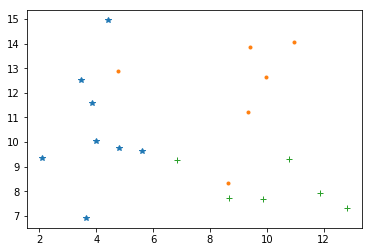

In [46]:
all=poblacion[0,:]

d1=np.argwhere(all==1)
d2=np.argwhere(all==2)
d3=np.argwhere(all==3)
d4=np.argwhere(all==4)

datos1=Xdata[d1[:,0]]
datos2=Xdata[d2[:,0]]
datos3=Xdata[d3[:,0]]
datos4=Xdata[d4[:,0]]

plt.plot(datos1[:,0],datos1[:,1],'*')
plt.plot(datos2[:,0],datos2[:,1],'.')
plt.plot(datos3[:,0],datos3[:,1],'+')
plt.plot(datos4[:,0],datos4[:,1],'x')
plt.show()